<a href="https://colab.research.google.com/github/ManikanthaM/DL/blob/master/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## download a chunk of microsoft's cat vs dogs dataset (2000 imgs)
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-06-16 05:18:11--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 2607:f8b0:400c:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   134MB/s    in 0.5s    

2020-06-16 05:18:11 (134 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
## extract the dataset
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
## import the libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

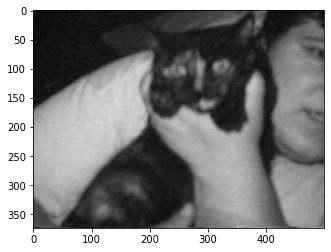

In [19]:
## load in the dataset and view
DATADIR = '/tmp/cats_and_dogs_filtered/train'
CATEGORIES = ['cats', 'dogs']
for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break
  break

In [20]:
print(img_array)

[[ 35  33  29 ...  23  19  18]
 [ 30  29  26 ...  26  21  20]
 [ 25  25  24 ...  26  21  19]
 ...
 [ 92  92  88 ... 126 132 135]
 [ 88  84  81 ... 152 157 159]
 [ 23  17  14 ... 146 150 152]]


In [21]:
print(img_array.shape)

(374, 500)


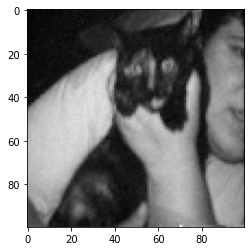

In [22]:
## resize the img
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [0]:
## create training data
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
          try:
              img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
              new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
              training_data.append([new_array, class_num])
          except Exception as e:
            pass

create_training_data()

In [31]:
print(len(training_data))

2000


In [0]:
## shuffle the training data for learning
import random
random.shuffle(training_data)

In [36]:
## check the shuffle
for sample in training_data[:10]:
  print(sample[1])

0
0
0
0
0
0
1
0
1
0


In [0]:
## Packing the data into lists x and y
x=[]
y=[]

for features, label in training_data:
  x.append(features)
  y.append(label)

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
## serialize the training data using pickle and save to disk
import pickle

pickle_out = open('x.pickle', 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [72]:
pickle_in = open('x.pickle', 'rb')
x = pickle.load(pickle_in)
x[1]

array([[[199],
        [197],
        [193],
        ...,
        [163],
        [167],
        [171]],

       [[191],
        [193],
        [192],
        ...,
        [168],
        [161],
        [156]],

       [[183],
        [194],
        [193],
        ...,
        [194],
        [188],
        [186]],

       ...,

       [[194],
        [200],
        [197],
        ...,
        [  7],
        [  7],
        [  7]],

       [[191],
        [192],
        [201],
        ...,
        [  9],
        [  8],
        [  8]],

       [[189],
        [204],
        [174],
        ...,
        [  9],
        [  8],
        [  8]]], dtype=uint8)

In [0]:
## creating a CNN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

## load serialized pickle files

X = pickle.load(open('x.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

In [0]:
## Normalize the dataset
X=np.array(X/255.0)
y=np.array(y)

In [94]:
## Build the CNN model

# First layer
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# FC layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

# training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, batch_size=15, epochs=30, validation_split = 0.2)

Epoch 1/30
107/107 [==============================] - 35s 325ms/step - loss: 0.6977 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.4850
Epoch 2/30
107/107 [==============================] - 35s 329ms/step - loss: 0.6915 - accuracy: 0.5213 - val_loss: 0.6901 - val_accuracy: 0.5175
Epoch 3/30
107/107 [==============================] - 35s 325ms/step - loss: 0.6864 - accuracy: 0.5500 - val_loss: 0.6986 - val_accuracy: 0.5200
Epoch 4/30
107/107 [==============================] - 35s 324ms/step - loss: 0.6778 - accuracy: 0.6025 - val_loss: 0.6599 - val_accuracy: 0.6125
Epoch 5/30
107/107 [==============================] - 35s 327ms/step - loss: 0.6248 - accuracy: 0.6669 - val_loss: 0.6928 - val_accuracy: 0.5875
Epoch 6/30
107/107 [==============================] - 35s 325ms/step - loss: 0.5747 - accuracy: 0.7094 - val_loss: 0.6984 - val_accuracy: 0.6225
Epoch 7/30
107/107 [==============================] - 35s 326ms/step - loss: 0.5374 - accuracy: 0.7306 - val_loss: 0.7062 - val_ac